# Imersão de Dados 04 - Aula 01

<h2><i>Seu primeiro Colab com Python e Pandas</i></h2>

<hr>
<hr>

# Desafios Aula 01:
- Realizar a média da metragem para cada um dos bairros
- 2 Formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas)
- Explorar alguns gráficos na documentação e aplicar nas demais colunas do dataset, tentar colocar alguma conclusão 
- Pegar outros estatísticos dos dados, média, mediana, min, max, variância
- Descobrir quais são os bairros que não tem nome de rua


Célula necessária para execução dos desafios

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import pandas as pd
import numpy as np
import random

file_path = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dataset = pd.read_csv(file_path)
dataset.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


## Desafio 01 - Realizar a média da metragem para cada um dos bairros

In [ ]:
dataset.groupby("Bairro")["Metragem"].mean()

Bairro
Aclimação           253.06
Alto da Boa Vista   418.88
Alto da Lapa        294.34
Alto da Mooca       270.05
Alto de Pinheiros   433.44
                     ...  
Vila Água Funda     152.20
Água Branca         191.00
Água Fria           165.42
Água Funda          139.00
Água Rasa           340.25
Name: Metragem, Length: 701, dtype: float64

##  Desafio 02 - 2 Formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas)

In [ ]:
## Primeira forma
# dataset[dataset.Bairro == "nome_do_bairro"]
dataset[dataset.Bairro == "Planalto Paulista"]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0
75,Rua Francisco de Paula Brito,Planalto Paulista,São Paulo,250,3,4,4,2190000.0
79,Rua Elisa Rodrigues,Planalto Paulista,São Paulo,184,4,3,4,1390000.0
87,NaN,Planalto Paulista,São Paulo,119,2,2,2,670000.0
116,Alameda dos Guainumbis,Planalto Paulista,São Paulo,200,4,6,3,2014000.0
...,...,...,...,...,...,...,...,...
9878,NaN,Planalto Paulista,São Paulo,200,3,3,3,680000.0
9883,Alameda dos Tupinas,Planalto Paulista,São Paulo,405,4,6,4,1550000.0
9930,Avenida Odila,Planalto Paulista,São Paulo,262,3,6,4,1500000.0
9966,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.0


In [ ]:
## Segunda forma
# dataset[(dataset["bairro"] == "nome_do_bairro")]
dataset[(dataset["Bairro"] == "Planalto Paulista")]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0
75,Rua Francisco de Paula Brito,Planalto Paulista,São Paulo,250,3,4,4,2190000.0
79,Rua Elisa Rodrigues,Planalto Paulista,São Paulo,184,4,3,4,1390000.0
87,NaN,Planalto Paulista,São Paulo,119,2,2,2,670000.0
116,Alameda dos Guainumbis,Planalto Paulista,São Paulo,200,4,6,3,2014000.0
...,...,...,...,...,...,...,...,...
9878,NaN,Planalto Paulista,São Paulo,200,3,3,3,680000.0
9883,Alameda dos Tupinas,Planalto Paulista,São Paulo,405,4,6,4,1550000.0
9930,Avenida Odila,Planalto Paulista,São Paulo,262,3,6,4,1500000.0
9966,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.0


## Desafio 03 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do dataset, tentar colocar alguma conclusão

#### Histograma

A partir do Histograma gerado abaixo, conseguimos ver que a maioria dos imóveis de São Paulo estão entre 0 a 400 m²

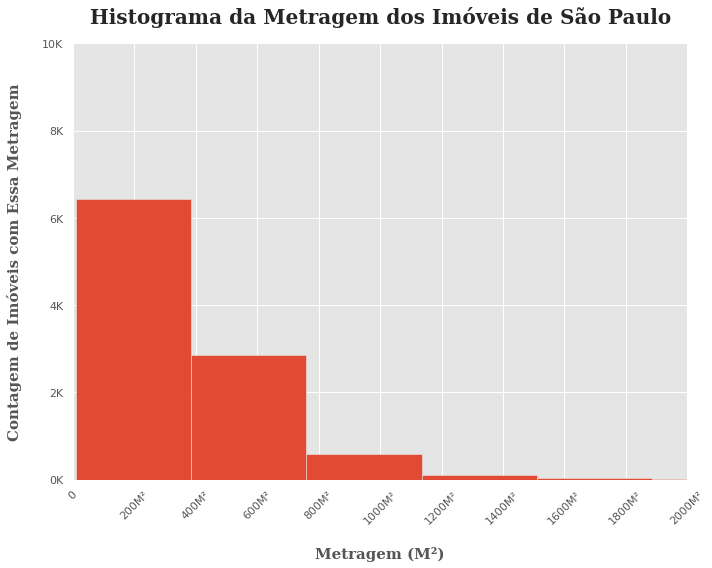

In [ ]:
# Função para formatar o eixo x
def formatter_x(data_value, index):
  formatter = f"{(data_value):1.0f}M²" if data_value != 0 else 0
  return formatter

# Função para formatar o eixo y
def formatter_y(data_value, index):
  formatter = f"{(data_value*0.001):1.0f}K"
  return formatter

# Propriedades dos textos
dict_font1 = {
    "fontsize": 15,
    "fontweight": "bold",
    "fontfamily": "serif"
}
dict_font2 = {
    "fontsize": 20,
    "fontweight": "bold",
    "fontfamily": "serif"
}


plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(10,8))

# Definindo o intervalo de valores mostrados, o limite do eixo x e o limite do eixo y
plt.xticks(np.arange(0, 2001, 200))
plt.xlim((0,2000))
plt.ylim((0,10_000))

# plotando o histograma
ax.hist(data=dataset, x="Metragem", bins=2000)

## Alterando título, xlabel, ylabel e rotação dos xticks
ax.set_title(label="Histograma da Metragem dos Imóveis de São Paulo", fontdict=dict_font2, pad=20)
plt.xlabel(xlabel="Metragem (M²)", fontdict=dict_font1, labelpad=20)
plt.ylabel(ylabel="Contagem de Imóveis com Essa Metragem", fontdict=dict_font1, labelpad=20)
plt.xticks(rotation=45)

## Formatando as labels
ax.xaxis.set_major_formatter(tick.FuncFormatter(formatter_x))
ax.yaxis.set_major_formatter(tick.FuncFormatter(formatter_y))


plt.tight_layout()
plt.show()



#### Barras

A partir do gráfico de barras gerado, temos que o bairro que contém mais imóveis é o alto de pinheiros

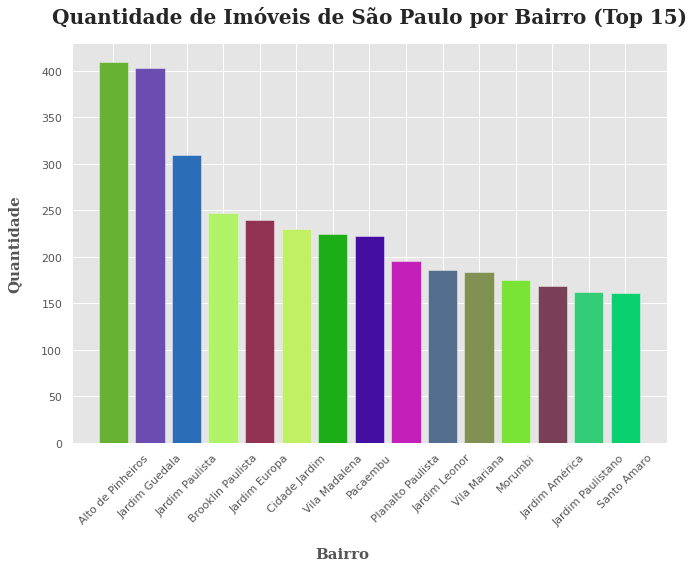

In [ ]:
height = dataset.Bairro.value_counts().sort_values(ascending=False).head(15)
x = dataset.Bairro.value_counts().sort_values(ascending=False).head(15).index

## Escolhendo 3 valores aleatórios para cada tupla rgb
colors = [(random.random(), random.random(), random.random()) for _ in range(0, 15)]

fontdict1 = {
    "fontsize": 15,
    "fontweight": "bold",
    "fontfamily": "serif"
}
fontdict2 = {
    "fontsize": 20,
    "fontweight": "bold",
    "fontfamily": "serif"
}

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(height=height, x=x, color=colors )

ax.set_title(label="Quantidade de Imóveis de São Paulo por Bairro (Top 15)", fontdict=fontdict2, pad=20)
plt.ylabel(ylabel="Quantidade", labelpad=20, fontdict=fontdict1)
plt.xlabel(xlabel="Bairro", labelpad=20, horizontalalignment="right", fontdict=fontdict1)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

## Desafio 04 - Pegar outros estatísticos dos dados, média, mediana, min, max, variância

In [ ]:
dataset.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor
count,10008.000000,10008.000000,10008.000000,10008.000000,1.000800e+04
mean,442.300659,3.483114,3.879097,4.097222,2.794170e+06
std,7515.379389,1.064200,1.988467,2.824014,3.866249e+06
min,10.000000,1.000000,1.000000,1.000000,1.650000e+03
25%,173.000000,3.000000,2.000000,2.000000,7.500000e+05
50%,290.000000,3.000000,4.000000,4.000000,1.600000e+06
75%,460.250000,4.000000,5.000000,5.000000,3.350000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


## Desafio 05 - Descobrir quais são os bairros que não tem nome de rua

In [ ]:
dataset[dataset.Rua.isnull()].Bairro.value_counts()

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64